In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random
import time

In [2]:
num_vertices = 100
num_edges = 500

# Generate adjacency matrix
g = [[0] * num_vertices for i in range(num_vertices)]
edges_generated = 0
while edges_generated < num_edges:
    vertex1 = random.randint(0, num_vertices - 1)
    vertex2 = random.randint(0, num_vertices - 1)

    if vertex1 != vertex2 and g[vertex1][vertex2] == 0:
        g[vertex1][vertex2] = random.randint(1,101)
        g[vertex2][vertex1] = g[vertex1][vertex2]
        edges_generated += 1
adj_mtrx=np.array([np.array(xi) for xi in g])

In [3]:
# Transfer the matrix into an adjacency list
adj_lst = {i: [] for i in range(num_vertices)}
for k, v in adj_lst.items():
    for i in range(num_vertices):
        adj_lst[k].append([i, adj_mtrx[k, i]]) if adj_mtrx[k, i] != 0 else next

In [4]:
lst = []
for k, v in adj_lst.items():
    lst.extend([[k, i[0], i[1]] for i in v])

In [5]:
def visualize(list):
        G = nx.Graph()
        plt.figure(figsize=(20,15))
        plt.title(f'My random graph with {num_vertices} vertices and {num_edges} edges',
                  fontsize=25)
        visualize = [i[0:2] for i in list]
        G.add_edges_from(visualize)
        nx.draw_networkx(G)
        plt.show()

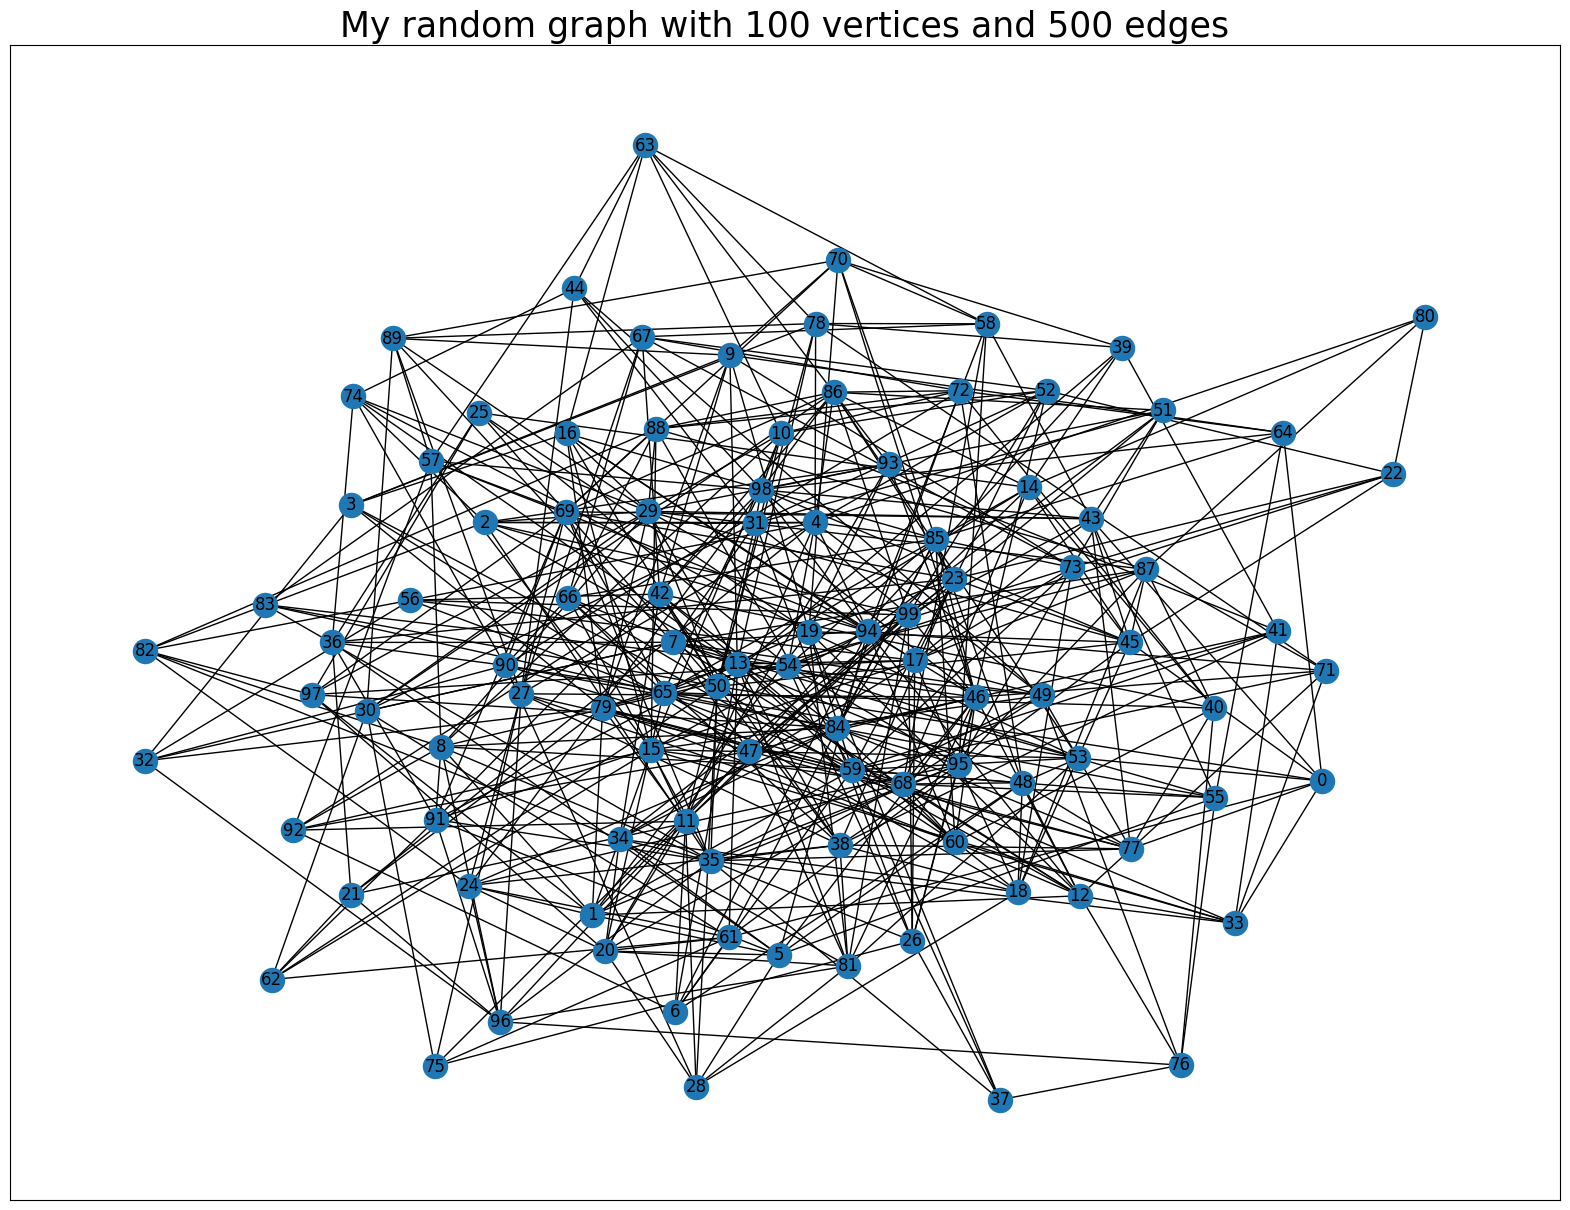

In [6]:
visualize(lst)

In [7]:
# Dijkstra's algorythms
import heapq
def dijkstra(start, graph):
    vertexes = len(graph)
    dist = [float('inf') for _ in range(vertexes)]
    prev = [-1 for _ in range(vertexes)]
    dist[start] = 0
    priority_queue = [(0, start)]

    while priority_queue:
        current_dist, u = heapq.heappop(priority_queue)
        if current_dist > dist[u]:
            continue
        for v, weight in enumerate(graph[u]):
            if weight != 0 and dist[u] + weight < dist[v]:
                dist[v] = dist[u] + weight
                prev[v] = u
                heapq.heappush(priority_queue, (dist[v], v))

    return dist

In [8]:
# Bellman-Ford algorithm
def bellman_ford(adj_matrix, start_vertex):
    num_vertices = adj_matrix.shape[0]
    distances = [float('inf')] * num_vertices
    distances[start_vertex] = 0


    for _ in range(num_vertices - 1):
        for u in range(num_vertices):
            for v in range(num_vertices):
                if adj_matrix[u][v] != 0 and distances[u] + adj_matrix[u][v] < distances[v]:
                    distances[v] = distances[u] + adj_matrix[u][v]

    for u in range(num_vertices):
        for v in range(num_vertices):
            if adj_matrix[u][v] != 0 and distances[u] + adj_matrix[u][v] < distances[v]:
                print("Graph contains negative weight cycle")
                return

    return distances

In [9]:
# Choose a random starting vertex
start_vertex = np.random.randint(0, num_vertices)
print(start_vertex)

71


In [14]:
# Apply the Dijkstra's algorithm
print("\nApplying Dijkstra's algorithm:")
dist = dijkstra(start_vertex,g)
print("Start vertex:", start_vertex)
print("Vertex Distance from to Distination \nFor first 10 vertices\nDistination\t\tPath Lenght")
for i in range(11):
    print("{0}\t\t\t{1}".format(i, dist[i]))


Applying Dijkstra's algorithm:
Start vertex: 71
Vertex Distance from to Distination 
For first 10 vertices
Distination		Path Lenght
0			79
1			66
2			74
3			76
4			55
5			42
6			70
7			45
8			56
9			59
10			65


In [15]:
# Apply the Bellman-Ford algorithm
print("\nApplying Bellman-Ford algorithm:")
distances = bellman_ford(adj_mtrx, start_vertex)
print("Start vertex:", start_vertex)
print("Vertex Distance from to Distination \nFor first 10 vertices\nDistination\t\tPath Lenght")
for i in range(11):
    print("{0}\t\t\t{1}".format(i, dist[i]))


Applying Bellman-Ford algorithm:
Start vertex: 71
Vertex Distance from to Distination 
For first 10 vertices
Distination		Path Lenght
0			79
1			66
2			74
3			76
4			55
5			42
6			70
7			45
8			56
9			59
10			65


In [16]:
# Comparing the time:
sum_time_D = 0
sum_time_BF = 0
for i in range(10):
  start_time = time.time()  # Record start time
  dijkstra(start_vertex,g);
  end_time = time.time()  # Record end time
  sum_time_D += end_time - start_time
for i in range(10):
  start_time = time.time()  # Record start time
  bellman_ford(adj_mtrx, start_vertex)
  end_time = time.time()  # Record end time
  sum_time_BF += end_time - start_time
print(f'Mean time of evaluating Dijkstra: {sum_time_D/10}')
print(f'Mean time of evaluating Bellman-Ford: {sum_time_BF/10}')

Mean time of evaluating Dijkstra: 0.0007030725479125977
Mean time of evaluating Bellman-Ford: 0.261009669303894


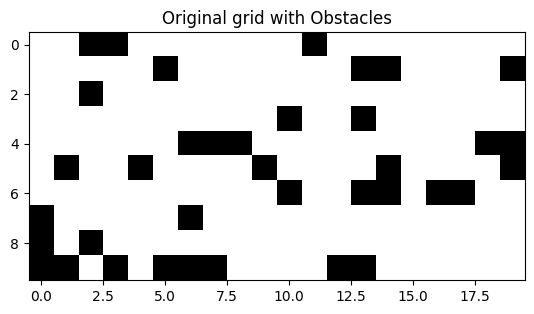

Start point:  (6, 1)
End point:  (5, 10)
Path lenght:  15
Path:  [(6, 1), (6, 2), (5, 2), (4, 2), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 9), (4, 10), (5, 10)]


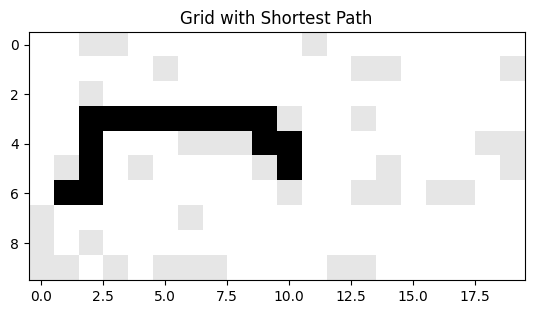

Start point:  (7, 4)
End point:  (2, 13)
Path lenght:  15
Path:  [(7, 4), (6, 4), (6, 5), (5, 5), (4, 5), (3, 5), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13)]


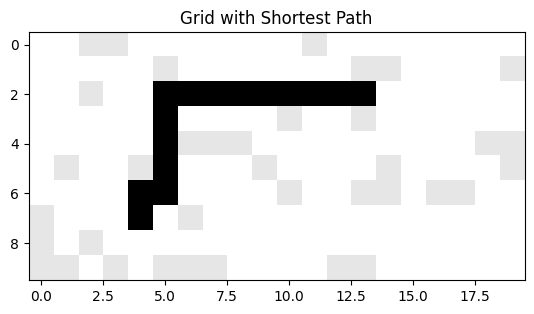

Start point:  (1, 10)
End point:  (6, 12)
Path lenght:  8
Path:  [(1, 10), (2, 10), (2, 11), (3, 11), (4, 11), (5, 11), (6, 11), (6, 12)]


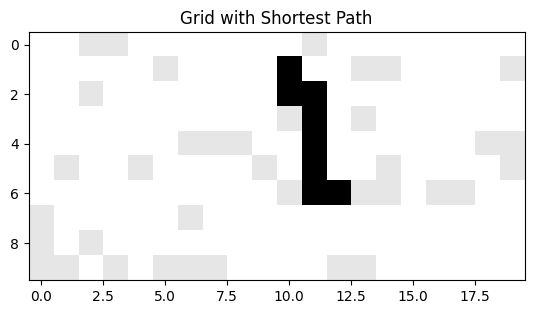

Start point:  (5, 3)
End point:  (8, 7)
Path lenght:  8
Path:  [(5, 3), (6, 3), (7, 3), (8, 3), (8, 4), (8, 5), (8, 6), (8, 7)]


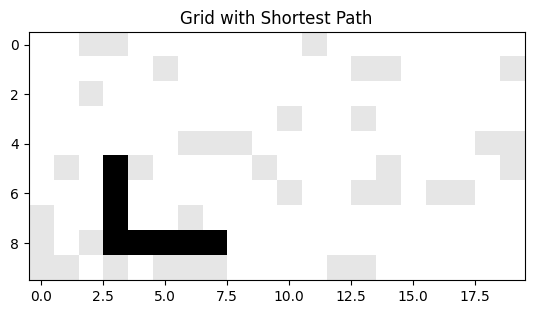

Start point:  (7, 3)
End point:  (1, 11)
Path lenght:  15
Path:  [(7, 3), (6, 3), (5, 3), (4, 3), (3, 3), (2, 3), (2, 4), (2, 5), (2, 6), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11)]


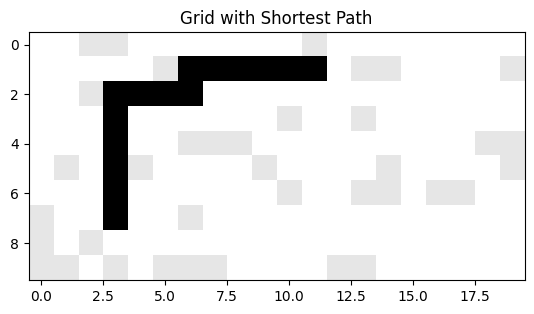

Average Time: 0.0015588400012347848


In [17]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import timeit

# Define the dimensions of the grid
rows = 10
cols = 20
num_obstacles = 40

# Create a function to generate the grid with obstacles
def generate_grid(rows, cols, num_obstacles):
    grid = np.zeros((rows, cols))
    for _ in range(num_obstacles):
        row = np.random.randint(0, rows)
        col = np.random.randint(0, cols)
        grid[row, col] = 1
    return grid

# Create a function to find a path between random non-obstacle cells
def find_path(grid):
    G = nx.grid_2d_graph(rows, cols)
    
    # Remove edges between cells with obstacles
    for row in range(rows):
        for col in range(cols):
            if grid[row, col] == 1:
                G.remove_node((row, col))

    def is_valid_cell(cell):
        row, col = cell
        return 0 <= row < rows and 0 <= col < cols and grid[row, col] == 0

    while True:
        start = (np.random.randint(0, rows), np.random.randint(0, cols))
        goal = (np.random.randint(0, rows), np.random.randint(0, cols))
        if is_valid_cell(start) and is_valid_cell(goal):
            print("Start point: ",start)
            print("End point: ",goal)
            break

    path = nx.astar_path(G, start, goal)
    return path

grid = generate_grid(rows, cols, num_obstacles)

# Visualize the grid
plt.imshow(grid, cmap='binary', origin='upper')
plt.title('Original grid with Obstacles')
plt.show()

sum_time = 0
for _ in range(5):
    start_time = timeit.default_timer()
    path = find_path(grid)
    print("Path lenght: ", len(path))
    print("Path: ", path)
    
    end_time = timeit.default_timer()
    sum_time+=(end_time-start_time)
    
    for node in path:
        grid[node] = 10
        
    plt.imshow(grid, cmap='binary')
    plt.title('Grid with Shortest Path')
    plt.show()
    
    for node in path:
        grid[node] = 0
        

average_time = sum_time/5
print(f"Average Time: {average_time}")
